In [1]:
#Load libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Read in Dataset
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
#Replace space in column names with underscore
df.columns = df.columns.str.replace(' ', '_')

In [4]:
# Change Date to DateTime Format & Sort dataset by Date 
df['Date']= pd.to_datetime(df['Date'])
df = df.sort_values(['Date'])

In [5]:
#Melt Dataframe for plotting all stock price options 
df_melt = pd.melt(df, id_vars= ['Date'],value_vars=['Open', 'High', 'Low', 'Close', 'Adj_Close'],
    var_name= 'Stock',value_name='Stock_Price')
df_melt.head()

,Date,Stock,Stock_Price
0,2018-02-05,Open,262.000000
1,2018-02-06,Open,247.699997
2,2018-02-07,Open,266.579987
3,2018-02-08,Open,267.079987
4,2018-02-09,Open,253.850006


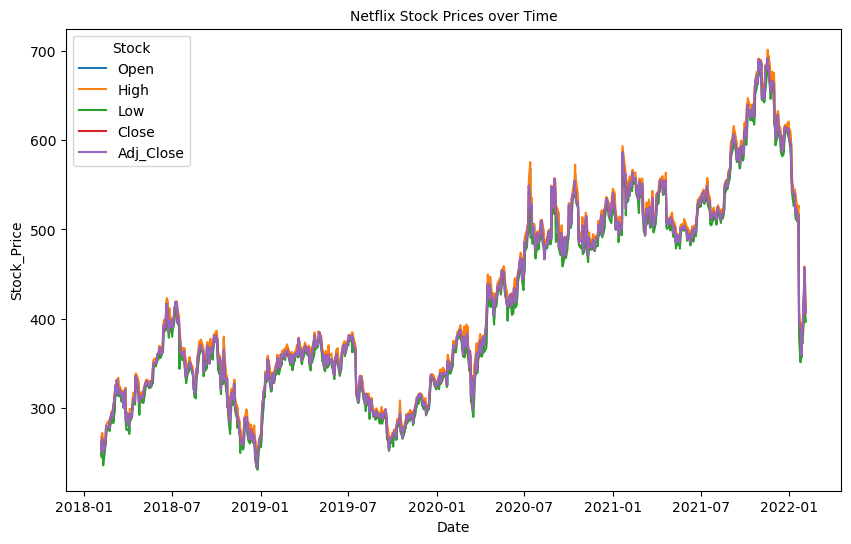

In [6]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df_melt , x = 'Date', y = 'Stock_Price', hue = 'Stock')
plt.title('Netflix Stock Prices over Time',fontsize=10)
plt.show()

In [7]:
#Set date as index
df = df.set_index(['Date'])

In [8]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [25]:
#Create X & y set
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj_Close']

In [26]:
# Split data into training & test by using firts 80% of data as training and remaining 20% as testing
train_int = int(X.shape[0]*0.8)
X_train = X[:train_int]
X_test = X[train_int:]
y_train = y[:train_int]
y_test = y[train_int:]

In [27]:
# scale dateset
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [28]:
#Random Forest Model
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)

In [29]:
def evaluate(y_pred, y_true):
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_true, y_pred)), 2))
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_true, y_pred), 2))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_true, y_pred), 2))
    print("R^2 Score:", round(metrics.r2_score(y_true, y_pred), 2))
    errors = abs(y_pred - y_true)
    mape = 100 * (errors / y_true)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.') 

In [30]:
evaluate(predictions_RF, y_test)

Root Mean Squared Error: 41.11
Mean Absolute Error: 24.76
Mean Squared Error: 1689.63
R^2 Score: 0.66
Accuracy: 96.06 %.


In [31]:
Predictions_RF = pd.DataFrame(predictions_RF ,index =y_test.index, columns = ['Predictions'])
Predictions_full_RF = pd.merge(left = Predictions_RF, right = y_test, left_index = True, right_index = True)
Predictions_full_RF = Predictions_full_RF.rename(columns ={'Adj_Close':'Actuals'})
Predictions_full_RF.head()

,Predictions,Actuals
Date,,
2021-04-21,510.655103,508.899994
2021-04-22,506.358194,508.779999
2021-04-23,505.020995,505.549988
2021-04-26,507.743798,510.299988
2021-04-27,506.302699,505.549988


In [32]:
print('Standard Deviation of Test Set:', round(y_test.mean(),2))

Standard Deviation of Test Set: 557.65


In [33]:
Predictions_melt_RF = Predictions_full_RF.reset_index().melt(id_vars = ['Date'], var_name = 'Prediction/Actual', value_name = 'Stock_Price')

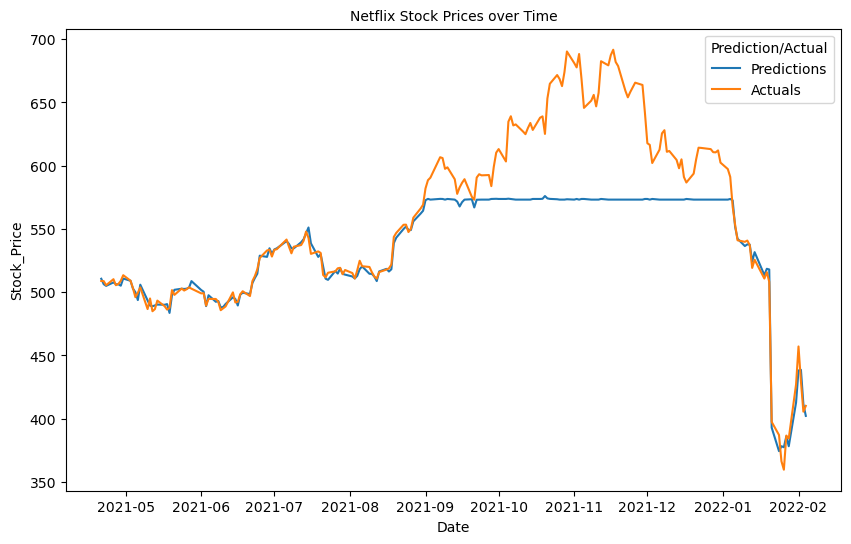

In [34]:
plt.figure(figsize = (10,6))
sns.lineplot(data = Predictions_melt_RF , x = 'Date', y = 'Stock_Price', hue = 'Prediction/Actual')
plt.title('Netflix Stock Prices over Time',fontsize=10)
plt.show()

In [46]:
importances = model_RF.feature_importances_
feature_names = X.columns
std = np.std([importances for tree in model_RF.estimators_], axis=0)

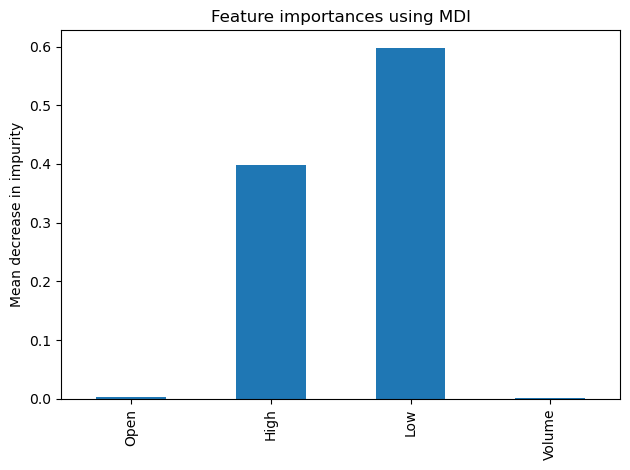

In [47]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [35]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)

In [36]:
evaluate(predictions_LR, y_test)

Root Mean Squared Error: 4.15
Mean Absolute Error: 3.05
Mean Squared Error: 17.26
R^2 Score: 1.0
Accuracy: 99.43 %.


In [37]:
Predictions_LR = pd.DataFrame(predictions_LR ,index =y_test.index, columns = ['Predictions'])
Predictions_full_LR = pd.merge(left = Predictions_LR, right = y_test, left_index = True, right_index = True)
Predictions_full_LR = Predictions_full_LR.rename(columns ={'Adj_Close':'Actuals'})
Predictions_full_LR.head()

,Predictions,Actuals
Date,,
2021-04-21,511.473180,508.899994
2021-04-22,503.570092,508.779999
2021-04-23,503.146828,505.549988
2021-04-26,506.877319,510.299988
2021-04-27,506.550967,505.549988


In [38]:
Predictions_melt_LR = Predictions_full_LR.reset_index().melt(id_vars = ['Date'], var_name = 'Prediction/Actual', value_name = 'Stock_Price')

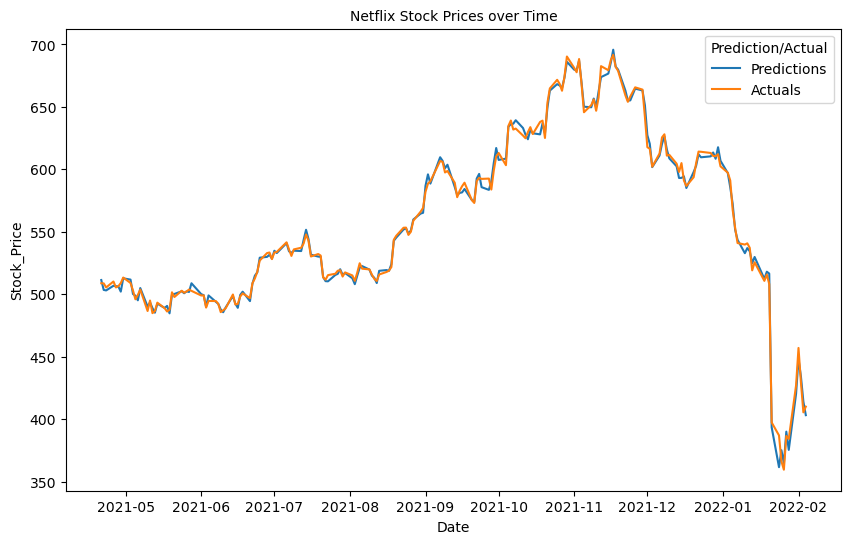

In [39]:
plt.figure(figsize = (10,6))
sns.lineplot(data = Predictions_melt_LR , x = 'Date', y = 'Stock_Price', hue = 'Prediction/Actual')
plt.title('Netflix Stock Prices over Time',fontsize=10)
plt.show()

In [53]:
importances = model_LR.coef_
feature_names = X.columns


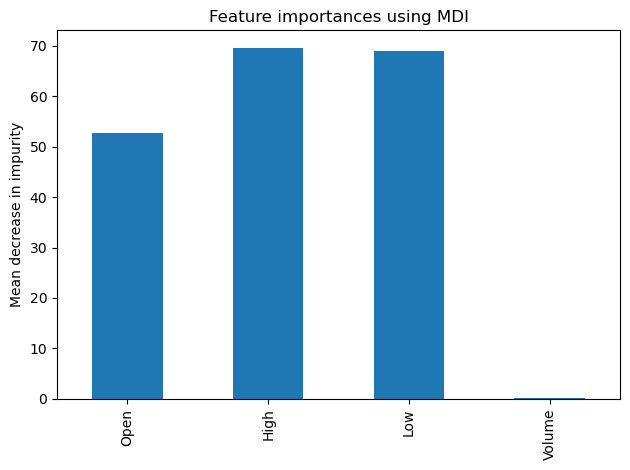

In [55]:
linear_importances = pd.Series(abs(importances), index=feature_names)

fig, ax = plt.subplots()
linear_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()